In [141]:
import pandas as pd

In [142]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.patches as mpatches

In [143]:
import numpy as np

In [144]:
import glob

In [145]:
def frequencies(df, max_steps=10**7):
    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

In [244]:
names = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]

In [245]:
files = glob.glob("../prc_data/Grid/*.csv")

In [246]:
dfs = []

for file in files:
    seed = float(file.split("one_")[1].split(".csv")[0])

    df = pd.read_csv(file, names=names)

    df = df.drop_duplicates()

    df["seed"] = seed

    df = frequencies(df, 10**7)

    dfs.append(df)

In [247]:
df = pd.concat(dfs)

In [248]:
df['seed'].nunique()

29

In [249]:
# df = df[df['seed'] < 11]

In [250]:
variables = ["p_1", "p_2", "p_3", "p_4", "frequencies"]

In [251]:
strategies = []

groups = df[(df["p_1"] == 1)].groupby("seed")

per_seed = []

for _, group in groups:
    index = group["frequencies"].idxmax()
    per_seed.append(tuple(group[group.index == index][variables].values[0]))

ps = list(zip(*per_seed))

strategies.append(ps[:-1])

In [252]:
groups = list(groups)

In [253]:
groups[8][1].sort_values('frequencies')

,p_1,p_2,p_3,p_4,t,cooperation,seed,frequencies,frequencies norm
12012,1.0,0.49,0.83,0.00,4074875,1.0,9.0,1,1.000000e-07
20723,1.0,0.66,0.80,0.96,7144295,1.0,9.0,1,1.000000e-07
27947,1.0,0.92,0.91,0.11,9802744,1.0,9.0,1,1.000000e-07
750,1.0,0.96,0.72,1.00,260669,1.0,9.0,1,1.000000e-07
3079,1.0,0.38,0.33,0.82,1011241,1.0,9.0,1,1.000000e-07
...,...,...,...,...,...,...,...,...,...
4986,1.0,0.23,0.17,0.28,1583083,1.0,9.0,37657,3.765700e-03
22144,1.0,0.79,0.04,0.07,7598133,1.0,9.0,39411,3.941100e-03
7270,1.0,0.32,0.02,0.05,2391533,1.0,9.0,40676,4.067600e-03
12368,1.0,0.62,0.18,0.09,4228324,1.0,9.0,41713,4.171300e-03


In [254]:
groups[8][1].sort_values('frequencies')

,p_1,p_2,p_3,p_4,t,cooperation,seed,frequencies,frequencies norm
12012,1.0,0.49,0.83,0.00,4074875,1.0,9.0,1,1.000000e-07
20723,1.0,0.66,0.80,0.96,7144295,1.0,9.0,1,1.000000e-07
27947,1.0,0.92,0.91,0.11,9802744,1.0,9.0,1,1.000000e-07
750,1.0,0.96,0.72,1.00,260669,1.0,9.0,1,1.000000e-07
3079,1.0,0.38,0.33,0.82,1011241,1.0,9.0,1,1.000000e-07
...,...,...,...,...,...,...,...,...,...
4986,1.0,0.23,0.17,0.28,1583083,1.0,9.0,37657,3.765700e-03
22144,1.0,0.79,0.04,0.07,7598133,1.0,9.0,39411,3.941100e-03
7270,1.0,0.32,0.02,0.05,2391533,1.0,9.0,40676,4.067600e-03
12368,1.0,0.62,0.18,0.09,4228324,1.0,9.0,41713,4.171300e-03


In [255]:
strategies = strategies[0]

In [259]:
spacing = np.linspace(-0.1, 0.1, 29)

evens = np.arange(1, 17, 1)

In [260]:
colors_dic = {
    "R1": "tab:orange",
    "R2": "tab:green",
    "R3": "tab:blue",
    "R4": "chocolate",
    "R5": "yellowgreen",
    "R6": "dodgerblue",
}

colors = [
    "tab:orange",
    "tab:green",
    "tab:blue",
    "chocolate",
    "yellowgreen",
    "dodgerblue",
]

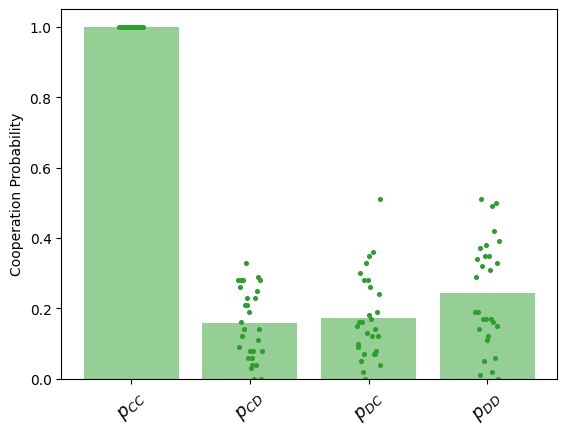

In [261]:
averages = np.mean(strategies, axis=1)

fig, ax = plt.subplots()

ax.bar(range(1, 5), averages, alpha=0.5, color=colors_dic['R2'])


for l, data in enumerate(strategies):
    for l2, point in enumerate(data):
        _ = ax.scatter(
            0 + evens[l] + spacing[l2],
            point,
            s=7,
            zorder=2,
         color=colors_dic['R2'],            
        )

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(
    ["$p_{CC}$", "$p_{CD}$", "$p_{DC}$", "$p_{DD}$"],
    rotation=45,
    fontsize=13,
);

ax.set_ylabel("Cooperation Probability", fontweight="normal");

fig.savefig("../figures/abundant_strategies_grib_sample.pdf", bbox_inches="tight")

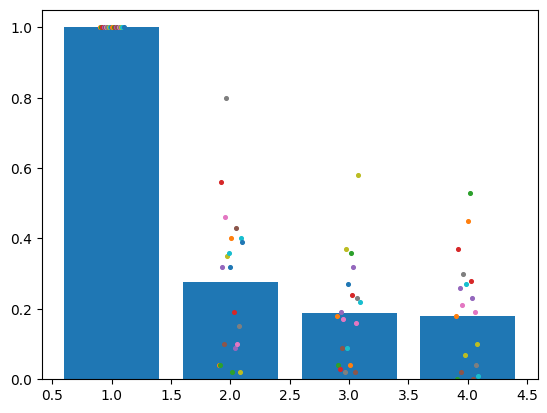

In [129]:
averages = np.mean(strategies, axis=1)

plt.bar(range(1, 5), averages)


for l, data in enumerate(strategies):
    for l2, point in enumerate(data):
        _ = plt.scatter(
            0 + evens[l] + spacing[l2],
            point,
            s=7,
            zorder=2,
        )